# 아웃라이어

[이상치 탐지를 하는 세가지 방법](https://modulabs.co.kr/blog/outlier-detection)

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings("ignore")

file_path = "./input/genres_v2.csv"

df = pd.read_csv(file_path, low_memory=False)
df = df.drop(['type', 'id', 'uri', 'track_href', 'analysis_url', 'song_name', 'Unnamed: 0', 'title', 'key', 'mode', 'time_signature'], axis=1)

df_y = df['genre']
df_x = df.drop(['genre'], axis=1)

In [111]:
def outlier_mode(class_label):
    return df_x[df_y == class_label].mode().iloc[0]

def outlier_mean(class_label):
    return df_x[df_y == class_label].mean()

def outlier_median(class_label):
    return df_x[df_y == class_label].median()

def impute_outliers(impute_function):
    for idx in outliers_indices:
        class_label = df_y[idx]
        df_x_imputed.iloc[idx] = impute_function(class_label)

def report(y_test, pred, label_encoder):
    '''
    accuracy, report, matrix
    '''
    print(f"accuracy score: {accuracy_score(y_test, pred)}")
    print(classification_report(y_test, pred))
    
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

z_scores = np.abs(zscore(df_x))
threshold = 3
outliers = np.where(z_scores > threshold)
outliers_indices = np.unique(outliers[0])
df_x_imputed = df_x.copy()

def train_model(df_x_imputed, df_y):
    # y label encoder
    label_encoder = LabelEncoder()
    df_y_encoded = label_encoder.fit_transform(df_y)
    # original_labels = label_encoder.classes_
    df_y = df_y_encoded

    # split
    X_train, X_test, y_train, y_test = train_test_split(df_x_imputed, df_y, test_size=0.2, shuffle=True, random_state=1, stratify=df_y)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=1, stratify=y_train)
    model = DecisionTreeClassifier(random_state=1)
    model.fit(X_train, y_train)
    pred_val = model.predict(X_val)

    report(y_val, pred_val, label_encoder)

    pred_test = model.predict(X_test)
    report(y_test, pred_test, label_encoder)

## 최빈값

accuracy score: 0.6099867040921849
              precision    recall  f1-score   support

           0       0.41      0.45      0.43       732
           1       0.60      0.59      0.60       269
           2       0.36      0.38      0.37       484
           3       0.25      0.20      0.22        74
           4       0.37      0.40      0.38       295
           5       0.39      0.38      0.38       336
           6       0.26      0.29      0.28       313
           7       0.38      0.35      0.37       940
           8       0.96      0.95      0.96       475
           9       0.84      0.84      0.84       470
          10       0.90      0.87      0.89       474
          11       0.84      0.85      0.85       476
          12       0.81      0.79      0.80       473
          13       0.76      0.74      0.75       480
          14       0.81      0.79      0.80       478

    accuracy                           0.61      6769
   macro avg       0.60      0.59      0.59  

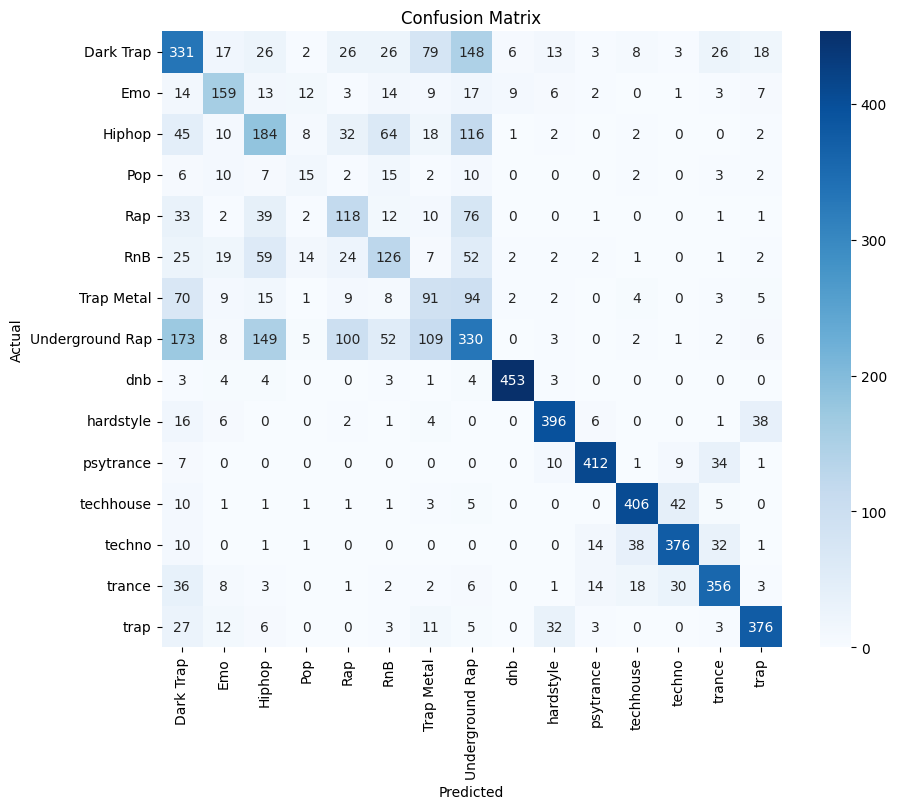

accuracy score: 0.6082023401489186
              precision    recall  f1-score   support

           0       0.39      0.43      0.41       916
           1       0.64      0.63      0.64       336
           2       0.38      0.41      0.39       606
           3       0.19      0.20      0.19        92
           4       0.36      0.39      0.38       370
           5       0.36      0.35      0.35       420
           6       0.23      0.26      0.25       391
           7       0.40      0.33      0.36      1175
           8       0.95      0.95      0.95       593
           9       0.85      0.82      0.84       587
          10       0.89      0.88      0.88       592
          11       0.81      0.88      0.84       595
          12       0.81      0.79      0.80       591
          13       0.80      0.80      0.80       600
          14       0.79      0.76      0.77       597

    accuracy                           0.61      8461
   macro avg       0.59      0.59      0.59  

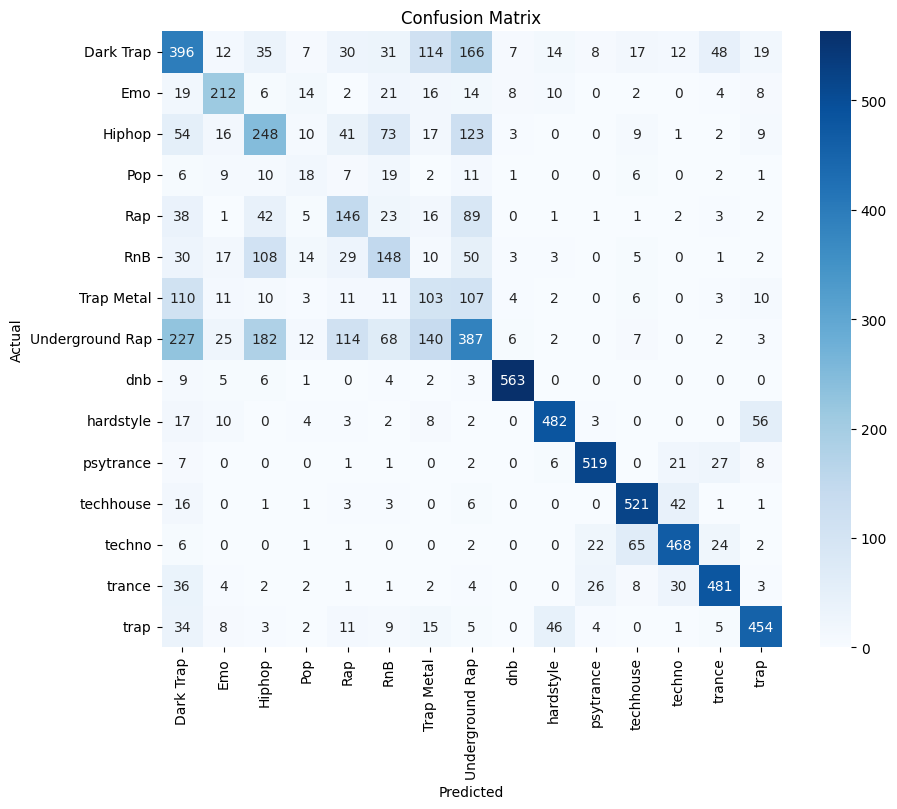

In [112]:
impute_outliers(outlier_mode)
train_model(df_x_imputed, df_y)

## 평균값

accuracy score: 0.6076229871472891
              precision    recall  f1-score   support

           0       0.41      0.44      0.42       732
           1       0.60      0.55      0.57       269
           2       0.36      0.39      0.37       484
           3       0.18      0.19      0.18        74
           4       0.40      0.42      0.41       295
           5       0.37      0.36      0.37       336
           6       0.27      0.29      0.28       313
           7       0.40      0.37      0.38       940
           8       0.94      0.95      0.95       475
           9       0.83      0.81      0.82       470
          10       0.89      0.88      0.89       474
          11       0.82      0.85      0.83       476
          12       0.81      0.78      0.79       473
          13       0.78      0.77      0.77       480
          14       0.80      0.77      0.78       478

    accuracy                           0.61      6769
   macro avg       0.59      0.59      0.59  

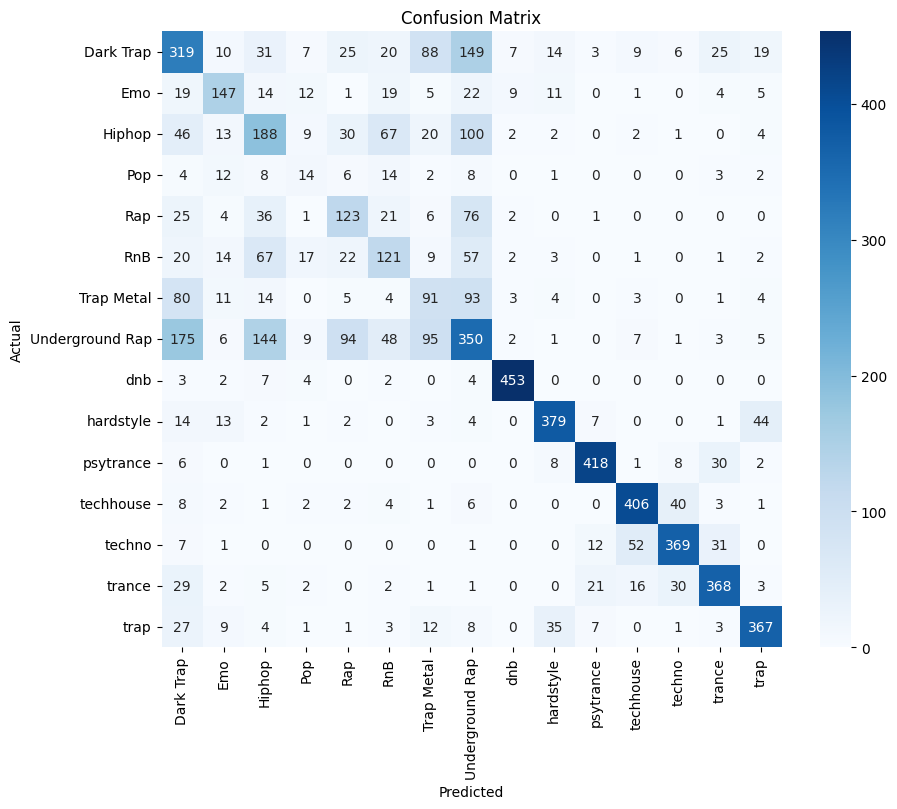

accuracy score: 0.6098569908994209
              precision    recall  f1-score   support

           0       0.40      0.44      0.42       916
           1       0.61      0.60      0.60       336
           2       0.37      0.40      0.38       606
           3       0.13      0.14      0.14        92
           4       0.39      0.40      0.39       370
           5       0.38      0.36      0.37       420
           6       0.23      0.25      0.24       391
           7       0.40      0.34      0.37      1175
           8       0.95      0.95      0.95       593
           9       0.84      0.84      0.84       587
          10       0.90      0.88      0.89       592
          11       0.82      0.88      0.85       595
          12       0.79      0.79      0.79       591
          13       0.81      0.80      0.80       600
          14       0.79      0.76      0.78       597

    accuracy                           0.61      8461
   macro avg       0.59      0.59      0.59  

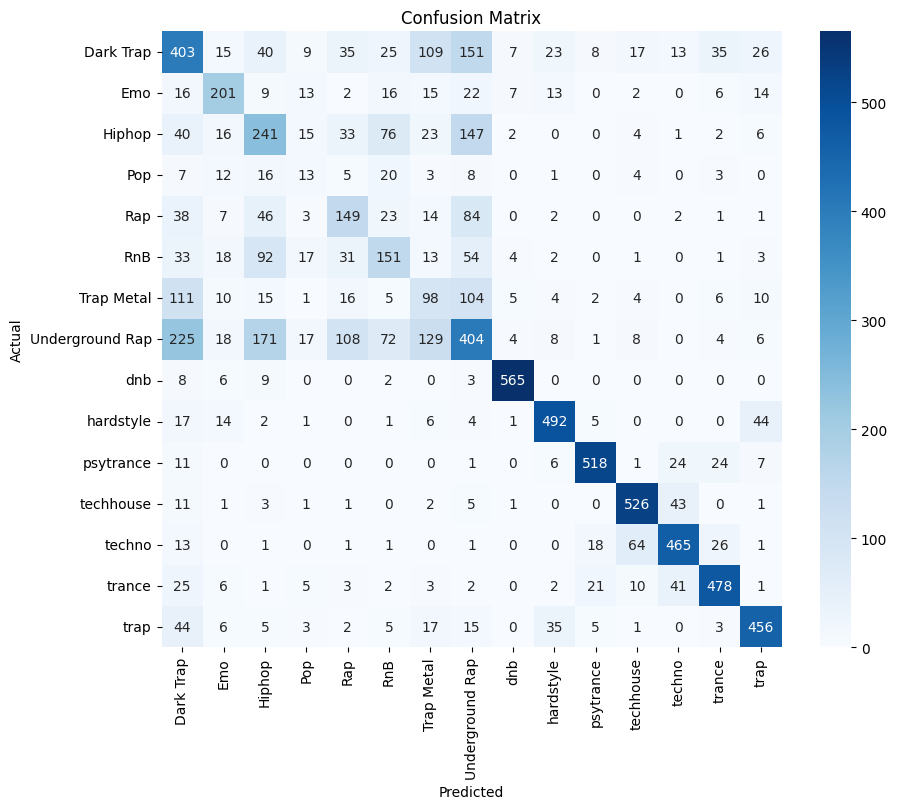

In [113]:
impute_outliers(outlier_mean)
train_model(df_x_imputed, df_y)

## 중앙값

accuracy score: 0.6065888609838972
              precision    recall  f1-score   support

           0       0.40      0.43      0.42       732
           1       0.62      0.52      0.57       269
           2       0.36      0.38      0.37       484
           3       0.14      0.14      0.14        74
           4       0.41      0.43      0.42       295
           5       0.39      0.38      0.39       336
           6       0.25      0.30      0.28       313
           7       0.39      0.35      0.37       940
           8       0.95      0.95      0.95       475
           9       0.84      0.85      0.84       470
          10       0.90      0.87      0.88       474
          11       0.84      0.84      0.84       476
          12       0.78      0.79      0.79       473
          13       0.75      0.74      0.75       480
          14       0.78      0.79      0.79       478

    accuracy                           0.61      6769
   macro avg       0.59      0.58      0.59  

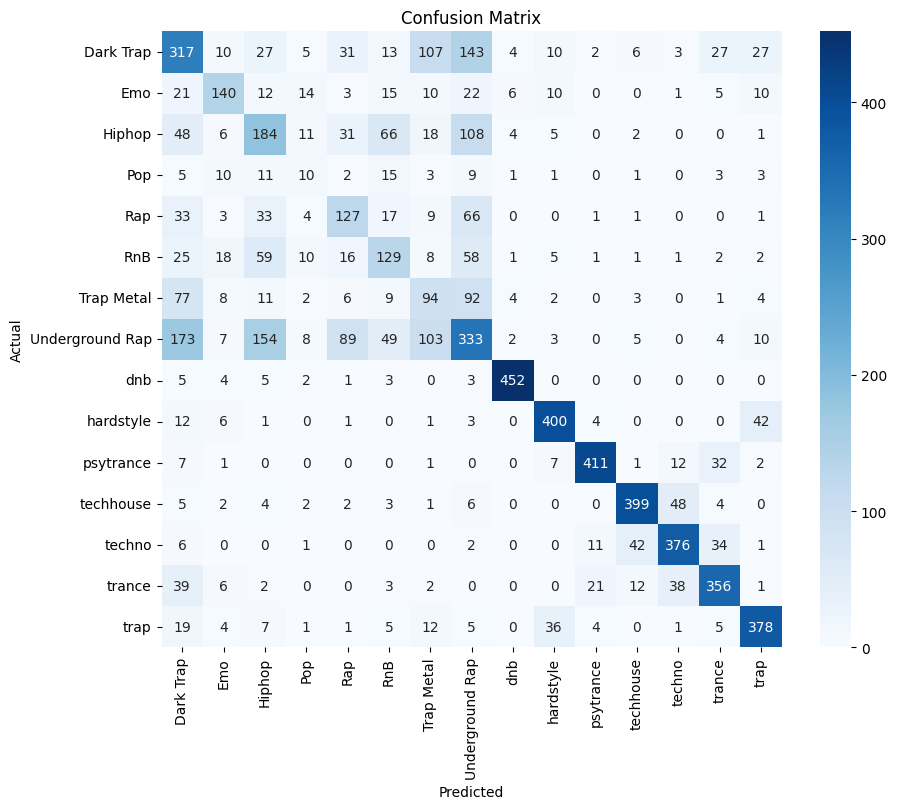

accuracy score: 0.6030020092187685
              precision    recall  f1-score   support

           0       0.40      0.42      0.41       916
           1       0.60      0.58      0.59       336
           2       0.38      0.40      0.39       606
           3       0.16      0.18      0.17        92
           4       0.36      0.39      0.38       370
           5       0.36      0.35      0.36       420
           6       0.23      0.26      0.25       391
           7       0.39      0.33      0.35      1175
           8       0.94      0.95      0.94       593
           9       0.85      0.82      0.84       587
          10       0.88      0.87      0.88       592
          11       0.82      0.88      0.85       595
          12       0.79      0.78      0.79       591
          13       0.80      0.80      0.80       600
          14       0.77      0.76      0.77       597

    accuracy                           0.60      8461
   macro avg       0.58      0.59      0.58  

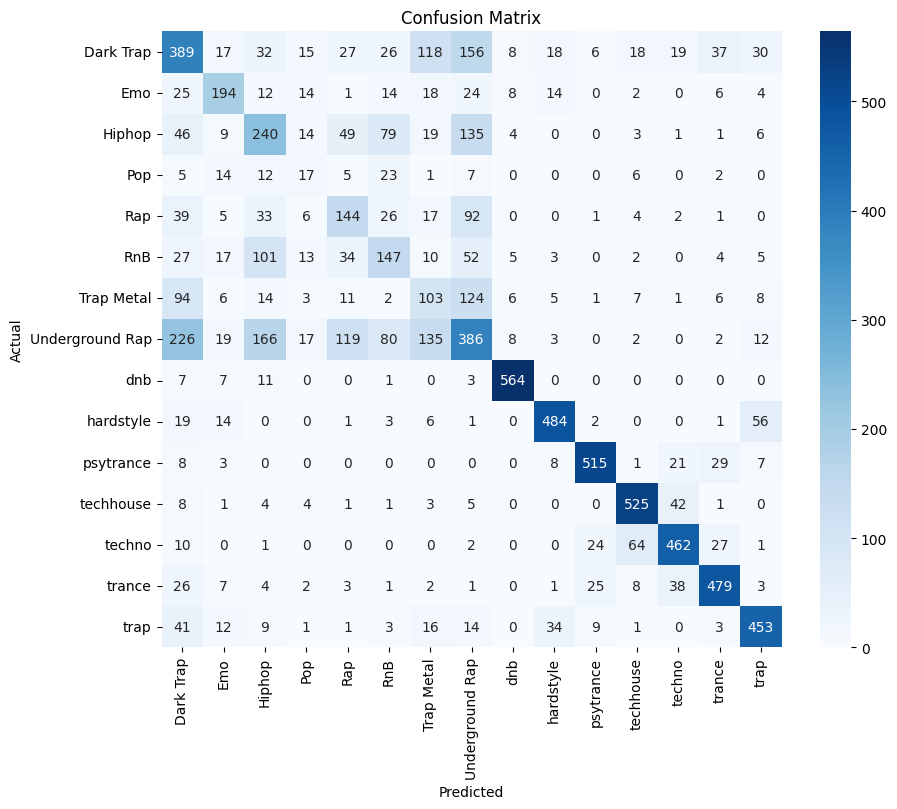

In [114]:
impute_outliers(outlier_median)
train_model(df_x_imputed, df_y)

일반 z_score에서는 평균이 제일 괜찮은데

수정된 z-score와 IQR에서는 1.0으로 나와서 확인해봐야... -> 모든 값을 아웃라이어로 설정해버림..

## 아웃라이어 제거

accuracy score: 0.5780124819971195
              precision    recall  f1-score   support

           0       0.35      0.40      0.37       643
           1       0.55      0.57      0.56       237
           2       0.29      0.29      0.29       432
           3       0.09      0.07      0.08        70
           4       0.32      0.32      0.32       269
           5       0.22      0.22      0.22       297
           6       0.17      0.19      0.18       281
           7       0.33      0.30      0.32       862
           8       0.94      0.95      0.94       465
           9       0.85      0.84      0.84       449
          10       0.86      0.88      0.87       424
          11       0.85      0.84      0.85       472
          12       0.79      0.79      0.79       454
          13       0.76      0.75      0.75       450
          14       0.80      0.77      0.78       444

    accuracy                           0.58      6249
   macro avg       0.55      0.55      0.54  

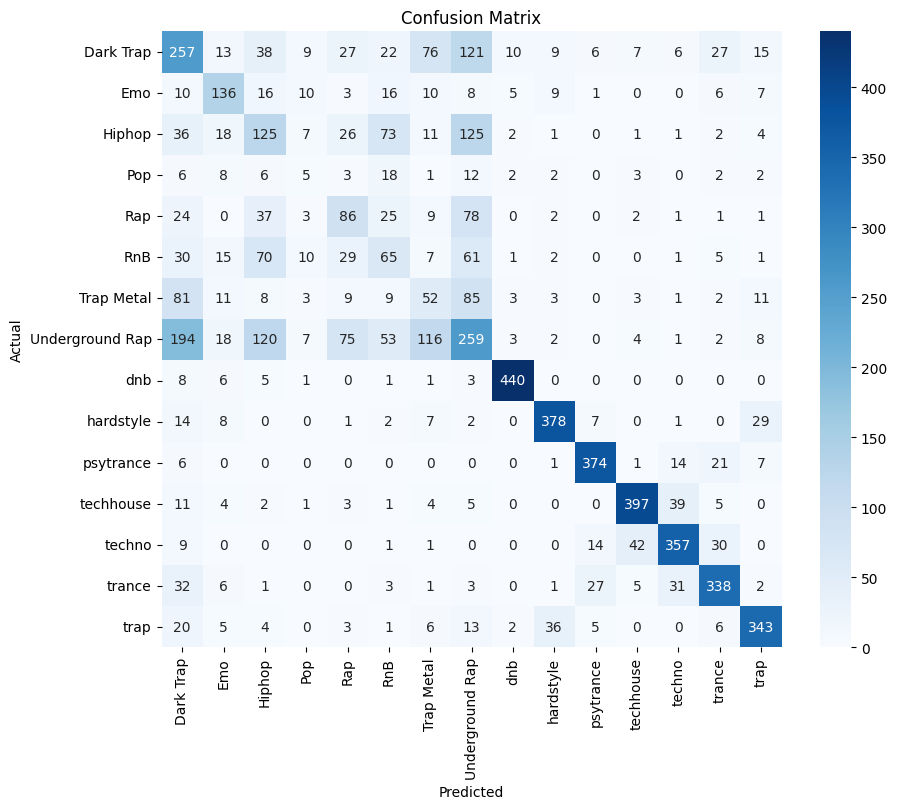

accuracy score: 0.5736781462040712
              precision    recall  f1-score   support

           0       0.34      0.38      0.36       804
           1       0.54      0.54      0.54       297
           2       0.28      0.30      0.29       539
           3       0.12      0.09      0.10        87
           4       0.28      0.31      0.30       336
           5       0.29      0.27      0.28       372
           6       0.19      0.21      0.20       351
           7       0.33      0.27      0.30      1077
           8       0.97      0.94      0.96       581
           9       0.80      0.81      0.81       562
          10       0.86      0.88      0.87       530
          11       0.84      0.84      0.84       590
          12       0.77      0.80      0.78       568
          13       0.76      0.75      0.75       562
          14       0.77      0.79      0.78       555

    accuracy                           0.57      7811
   macro avg       0.54      0.54      0.54  

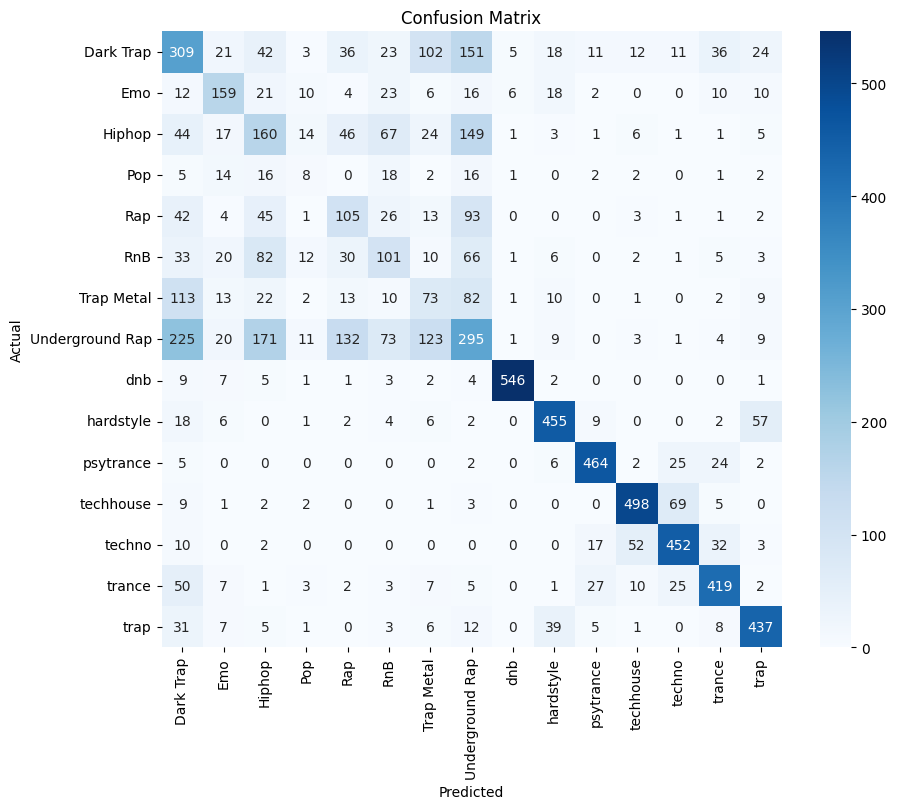

In [115]:
def remove_outliers(df_x, df_y, threshold):
    z_scores = np.abs(zscore(df_x))
    
    outlier_mask = np.any(z_scores > threshold, axis=1)
    
    df_x_clean = df_x[~outlier_mask].copy()
    df_y_clean = df_y[~outlier_mask].copy()
    
    return df_x_clean, df_y_clean

df_x_clean, df_y_clean = remove_outliers(df_x, df_y, threshold=3)

train_model(df_x_clean, df_y_clean)

제거하는건 데이터의 수가 많지 않아서 부적절

## thresholds 설정

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.stats import zscore

# 데이터 로드 및 전처리
file_path = "./input/genres_v2.csv"
df = pd.read_csv(file_path, low_memory=False)

df = df.drop(['type', 'id', 'uri', 'track_href', 'analysis_url', 'song_name',
              'Unnamed: 0', 'title', 'key', 'mode', 'time_signature'], axis=1)

df_y = df['genre']
df_x = df.drop(['genre'], axis=1)

# 레이블 인코딩
label_encoder = LabelEncoder()
df_y_encoded = label_encoder.fit_transform(df_y)
df_y = df_y_encoded

# 이상치 대체 함수
def outlier_mode(class_label):
    return df_x[df_y == class_label].mode().iloc[0]

def outlier_mean(class_label):
    return df_x[df_y == class_label].mean()

def outlier_median(class_label):
    return df_x[df_y == class_label].median()

def impute_outliers(df_x, df_y, threshold, impute_function):
    z_scores = np.abs(zscore(df_x))
    outliers_indices = np.where(z_scores > threshold)[0]
    df_x_imputed = df_x.copy()

    for idx in np.unique(outliers_indices):
        class_label = df_y[idx]
        imputed_values = impute_function(class_label)

        for col in df_x.columns:
            df_x_imputed.at[idx, col] = np.array(imputed_values[col]).astype(df_x[col].dtype)

    return df_x_imputed


def train_and_evaluate_with_kfold(df_x, df_y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    val_accuracies, test_accuracies = [], []
    val_precisions, test_precisions = [], []
    val_recalls, test_recalls = [], []
    val_f1s, test_f1s = [], []
    val_aucs, test_aucs = [], []

    for train_index, test_index in kf.split(df_x):
        X_train, X_test = df_x.iloc[train_index], df_x.iloc[test_index]
        y_train, y_test = df_y[train_index], df_y[test_index]

        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, 
                                                           shuffle=True, random_state=1, stratify=y_train)

        model = DecisionTreeClassifier(random_state=1)
        model.fit(X_train, y_train)

        # Validation
        pred_val = model.predict(X_val)
        val_accuracies.append(accuracy_score(y_val, pred_val))
        val_precisions.append(precision_score(y_val, pred_val, average='weighted', zero_division=0))
        val_recalls.append(recall_score(y_val, pred_val, average='weighted', zero_division=0))
        val_f1s.append(f1_score(y_val, pred_val, average='weighted'))
        
        if len(set(y_train)) > 2:
            val_aucs.append(roc_auc_score(y_val, model.predict_proba(X_val), multi_class="ovr"))
        else:
            val_aucs.append(roc_auc_score(y_val, model.predict_proba(X_val)[:, 1]))

        # Test
        pred_test = model.predict(X_test)
        test_accuracies.append(accuracy_score(y_test, pred_test))
        test_precisions.append(precision_score(y_test, pred_test, average='weighted', zero_division=0))
        test_recalls.append(recall_score(y_test, pred_test, average='weighted', zero_division=0))
        test_f1s.append(f1_score(y_test, pred_test, average='weighted'))

        if len(set(y_train)) > 2:
            test_aucs.append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr"))
        else:
            test_aucs.append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

    return (np.mean(val_accuracies), np.mean(test_accuracies),
            np.mean(val_precisions), np.mean(test_precisions),
            np.mean(val_recalls), np.mean(test_recalls),
            np.mean(val_f1s), np.mean(test_f1s),
            np.mean(val_aucs), np.mean(test_aucs))


thresholds = [0.5, 1.0, 1.5, 2.0, 2.5]
# impute_methods = {"mean": outlier_mean, "median": outlier_median, "mode": outlier_mode}
impute_methods = {"mean": outlier_mean}

best_acc = 0
best_params = {}
total_iterations = len(thresholds) * len(impute_methods)
start_time = time.time()

for i, threshold in enumerate(thresholds):
    for j, (method_name, method) in enumerate(impute_methods.items()):
        iter_start = time.time()
        df_x_imputed = impute_outliers(df_x, df_y, threshold, method)
        
        (avg_val_acc, avg_test_acc,
         avg_val_prec, avg_test_prec,
         avg_val_rec, avg_test_rec,
         avg_val_f1, avg_test_f1,
         avg_val_auc, avg_test_auc) = train_and_evaluate_with_kfold(df_x_imputed, df_y, k=5)

        elapsed_time = time.time() - start_time
        iter_time = time.time() - iter_start
        remaining_time = (total_iterations - ((i * len(impute_methods)) + j + 1)) * iter_time

        print(f"[{(i * len(impute_methods)) + j + 1}/{total_iterations}] "
              f"Threshold: {threshold}, Method: {method_name}, "
              f"Val Acc: {avg_val_acc:.4f}, Test Acc: {avg_test_acc:.4f}, "
              f"Val Prec: {avg_val_prec:.4f}, Test Prec: {avg_test_prec:.4f}, "
              f"Val Recall: {avg_val_rec:.4f}, Test Recall: {avg_test_rec:.4f}, "
              f"Val F1: {avg_val_f1:.4f}, Test F1: {avg_test_f1:.4f}, "
              f"Val AUC: {avg_val_auc:.4f}, Test AUC: {avg_test_auc:.4f} "
              f"({elapsed_time:.2f}s elapsed, ~{remaining_time:.2f}s remaining)")

        if avg_test_acc > best_acc:
            best_acc = avg_test_acc
            best_params = {"threshold": threshold, "method": method_name}

print("\nBest Settings:")
print(best_params)
print(f"Best Test Accuracy: {best_acc:.4f}")


[1/5] Threshold: 0.5, Method: mean, Val Acc: 1.0000, Test Acc: 1.0000, Val Prec: 1.0000, Test Prec: 1.0000, Val Recall: 1.0000, Test Recall: 1.0000, Val F1: 1.0000, Test F1: 1.0000, Val AUC: 1.0000, Test AUC: 1.0000 (19.88s elapsed, ~79.54s remaining)
[2/5] Threshold: 1.0, Method: mean, Val Acc: 0.9694, Test Acc: 0.9705, Val Prec: 0.9695, Test Prec: 0.9707, Val Recall: 0.9694, Test Recall: 0.9705, Val F1: 0.9694, Test F1: 0.9705, Val AUC: 0.9829, Test AUC: 0.9831 (42.12s elapsed, ~66.70s remaining)
[3/5] Threshold: 1.5, Method: mean, Val Acc: 0.8542, Test Acc: 0.8548, Val Prec: 0.8552, Test Prec: 0.8555, Val Recall: 0.8542, Test Recall: 0.8548, Val F1: 0.8545, Test F1: 0.8548, Val AUC: 0.9203, Test AUC: 0.9201 (59.23s elapsed, ~34.22s remaining)
[4/5] Threshold: 2.0, Method: mean, Val Acc: 0.7191, Test Acc: 0.7193, Val Prec: 0.7196, Test Prec: 0.7204, Val Recall: 0.7191, Test Recall: 0.7193, Val F1: 0.7190, Test F1: 0.7194, Val AUC: 0.8461, Test AUC: 0.8470 (73.35s elapsed, ~14.12s rem

threshold를 작게 설정할 수록 변경되는 아웃라이어의 갯수가 많아지므로 성능도 높아지는데, 이럴 때는 어떻게 아웃라이어를 설정해야할까..?

In [117]:
def get_outlier_stats(df_x, threshold):
    z_scores = np.abs(zscore(df_x))
    outlier_mask = np.any(z_scores > threshold, axis=1)
    
    total_size = len(df_x)
    outlier_count = np.sum(outlier_mask)
    clean_count = total_size - outlier_count
    outlier_ratio = outlier_count / total_size
    
    return {
        "total_size": total_size,
        "outlier_count": outlier_count,
        "clean_count": clean_count,
        "outlier_ratio": outlier_ratio
    }

for threshold in [1.5, 2.0, 2.5, 3.0, 3.5]:
    stats = get_outlier_stats(df_x, threshold)
    print(f"Threshold {threshold}:")
    print(f"  - 전체 데이터 크기: {stats['total_size']}")
    print(f"  - 이상치 수: {stats['outlier_count']}")
    print(f"  - 정상 데이터 수: {stats['clean_count']}")
    print(f"  - 이상치 비율: {stats['outlier_ratio']:.4f}")
    print()

Threshold 1.5:
  - 전체 데이터 크기: 42305
  - 이상치 수: 28932
  - 정상 데이터 수: 13373
  - 이상치 비율: 0.6839

Threshold 2.0:
  - 전체 데이터 크기: 42305
  - 이상치 수: 14574
  - 정상 데이터 수: 27731
  - 이상치 비율: 0.3445

Threshold 2.5:
  - 전체 데이터 크기: 42305
  - 이상치 수: 6845
  - 정상 데이터 수: 35460
  - 이상치 비율: 0.1618

Threshold 3.0:
  - 전체 데이터 크기: 42305
  - 이상치 수: 3251
  - 정상 데이터 수: 39054
  - 이상치 비율: 0.0768

Threshold 3.5:
  - 전체 데이터 크기: 42305
  - 이상치 수: 1822
  - 정상 데이터 수: 40483
  - 이상치 비율: 0.0431



z_score의 경우에 이상치의 수를 보았을 때 2.5 ~ 3.0가 적절

## 오버피팅인지 학습곡선 확인..

accuracy score: 0.6148209431509278
              precision    recall  f1-score   support

           0       0.40      0.43      0.41       939
           1       0.56      0.60      0.58       306
           2       0.38      0.39      0.38       618
           3       0.19      0.17      0.18        92
           4       0.39      0.44      0.41       352
           5       0.36      0.37      0.36       384
           6       0.28      0.29      0.29       390
           7       0.43      0.37      0.40      1212
           8       0.94      0.95      0.95       628
           9       0.83      0.84      0.83       613
          10       0.90      0.88      0.89       590
          11       0.86      0.85      0.85       596
          12       0.80      0.79      0.79       581
          13       0.76      0.79      0.77       598
          14       0.78      0.79      0.78       562

    accuracy                           0.61      8461
   macro avg       0.59      0.60      0.59  

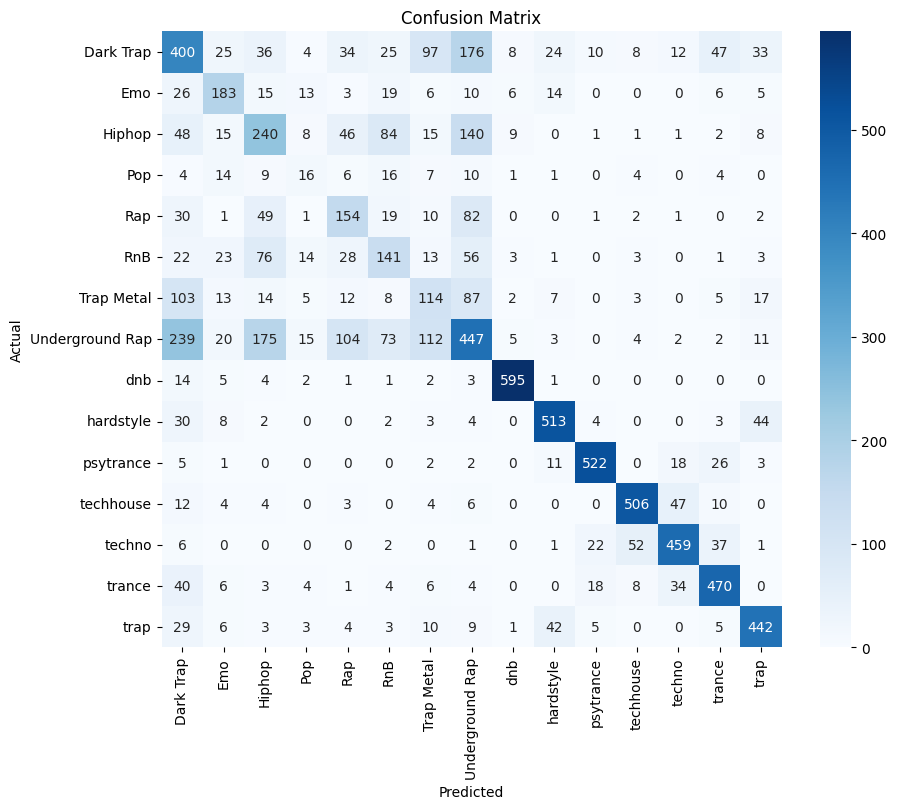

accuracy score: 0.5993381396997991
              precision    recall  f1-score   support

           0       0.39      0.42      0.40       885
           1       0.62      0.57      0.59       361
           2       0.35      0.39      0.37       607
           3       0.18      0.21      0.19        95
           4       0.40      0.44      0.42       399
           5       0.34      0.32      0.33       437
           6       0.26      0.26      0.26       407
           7       0.38      0.33      0.35      1172
           8       0.97      0.96      0.96       588
           9       0.85      0.85      0.85       560
          10       0.85      0.87      0.86       584
          11       0.86      0.84      0.85       591
          12       0.75      0.79      0.77       581
          13       0.78      0.75      0.76       605
          14       0.78      0.81      0.79       589

    accuracy                           0.60      8461
   macro avg       0.58      0.59      0.58  

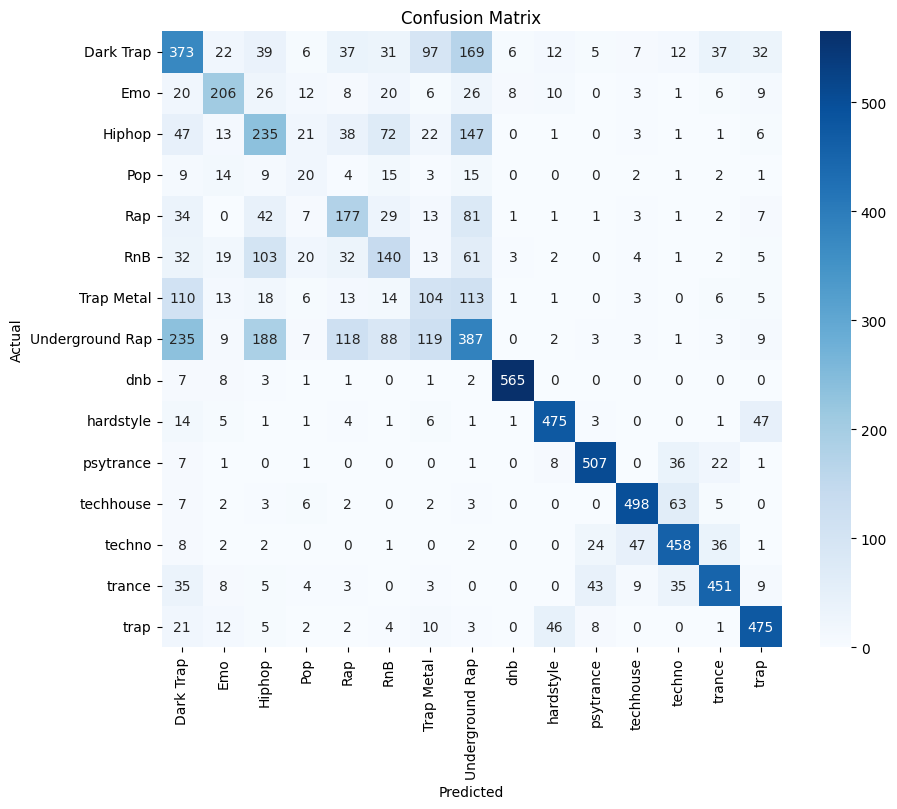

accuracy score: 0.6040657132726628
              precision    recall  f1-score   support

           0       0.40      0.43      0.41       928
           1       0.64      0.60      0.62       358
           2       0.36      0.41      0.38       610
           3       0.22      0.23      0.22        93
           4       0.35      0.37      0.36       366
           5       0.37      0.36      0.37       423
           6       0.28      0.26      0.27       404
           7       0.39      0.35      0.37      1131
           8       0.94      0.92      0.93       555
           9       0.84      0.87      0.86       604
          10       0.87      0.87      0.87       586
          11       0.84      0.82      0.83       603
          12       0.80      0.82      0.81       589
          13       0.78      0.75      0.76       603
          14       0.77      0.76      0.76       608

    accuracy                           0.60      8461
   macro avg       0.59      0.59      0.59  

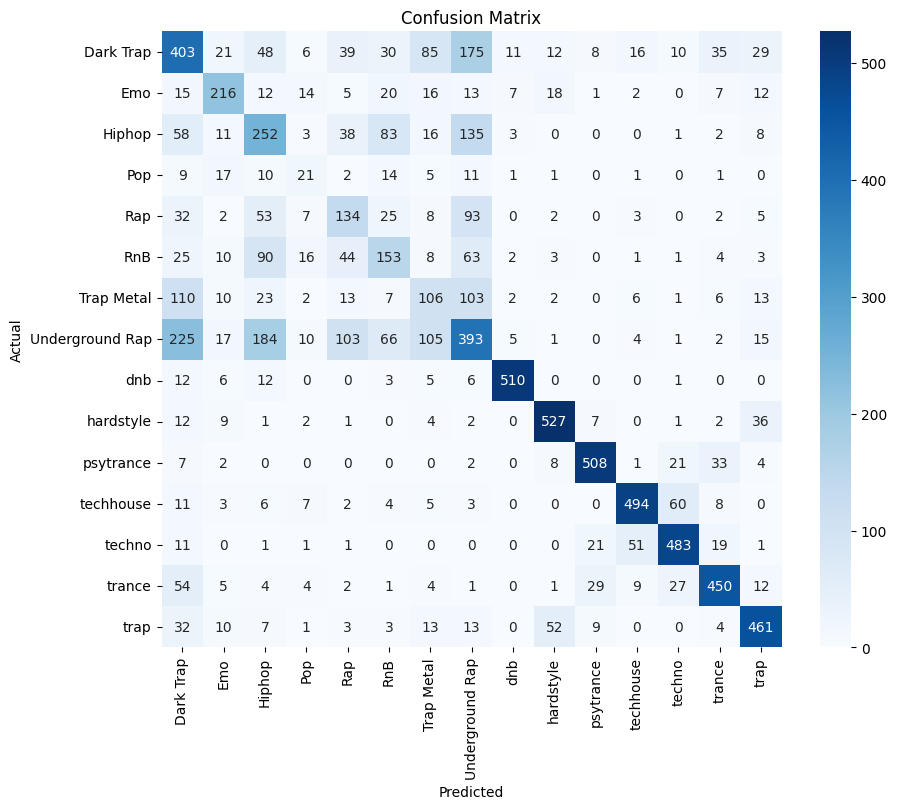

accuracy score: 0.6072568254343458
              precision    recall  f1-score   support

           0       0.42      0.44      0.43       930
           1       0.57      0.58      0.58       328
           2       0.37      0.38      0.38       619
           3       0.14      0.16      0.15        96
           4       0.34      0.39      0.36       347
           5       0.39      0.36      0.37       433
           6       0.28      0.31      0.29       377
           7       0.40      0.34      0.37      1173
           8       0.93      0.94      0.93       602
           9       0.84      0.83      0.83       570
          10       0.90      0.88      0.89       635
          11       0.83      0.85      0.84       588
          12       0.80      0.79      0.80       588
          13       0.77      0.79      0.78       603
          14       0.74      0.77      0.76       572

    accuracy                           0.61      8461
   macro avg       0.58      0.59      0.58  

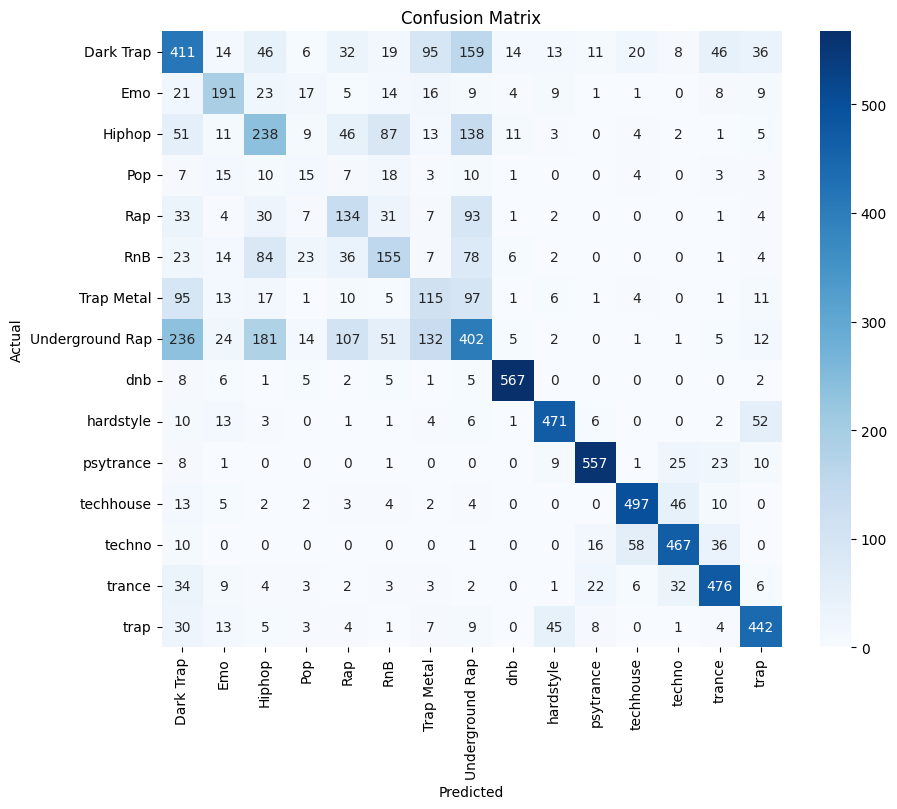

accuracy score: 0.6115116416499232
              precision    recall  f1-score   support

           0       0.42      0.49      0.45       896
           1       0.60      0.57      0.59       327
           2       0.33      0.40      0.36       574
           3       0.17      0.18      0.17        85
           4       0.39      0.39      0.39       384
           5       0.34      0.32      0.33       422
           6       0.25      0.28      0.27       378
           7       0.40      0.32      0.35      1187
           8       0.94      0.95      0.94       593
           9       0.83      0.85      0.84       589
          10       0.88      0.89      0.88       566
          11       0.84      0.85      0.85       597
          12       0.81      0.80      0.81       617
          13       0.80      0.78      0.79       590
          14       0.81      0.77      0.79       656

    accuracy                           0.61      8461
   macro avg       0.59      0.59      0.59  

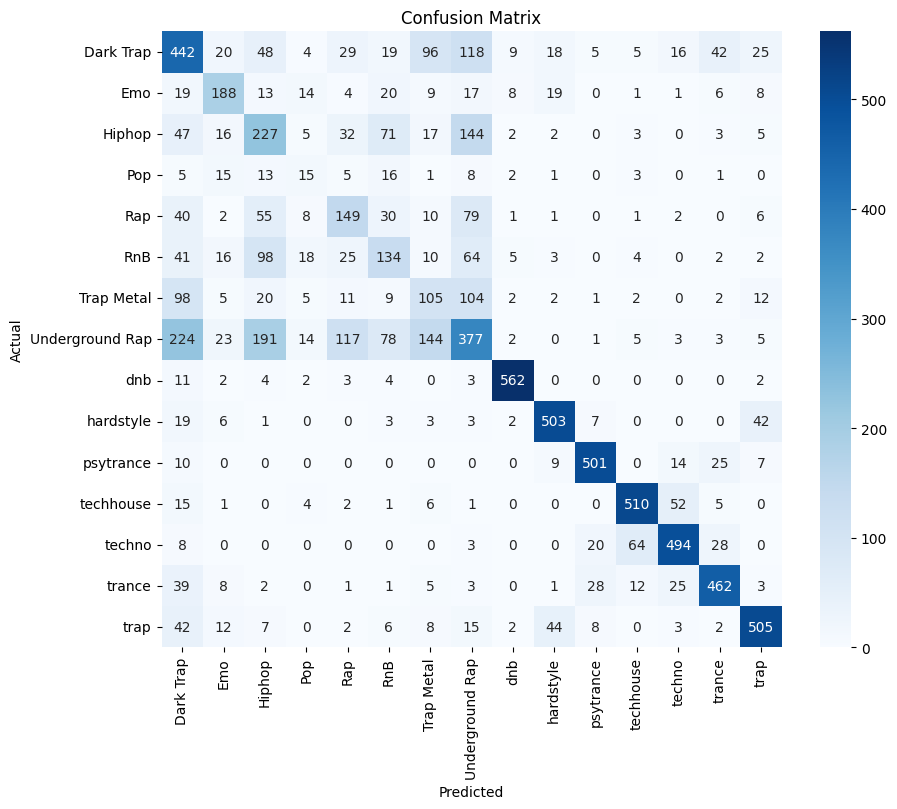

Validation Accuracy: 0.6030
Test Accuracy: 0.6074


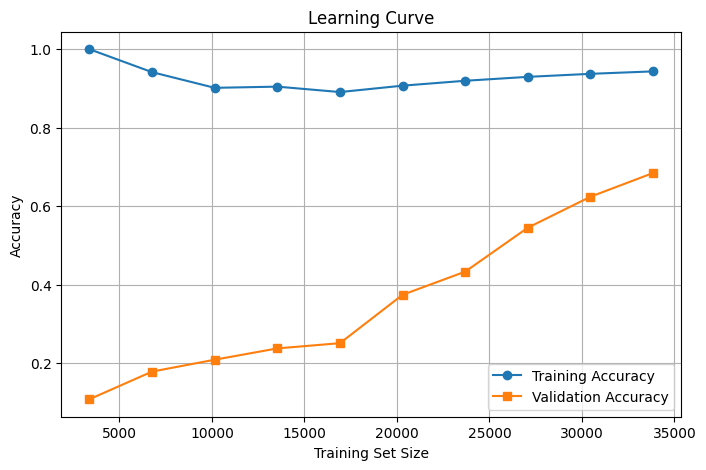

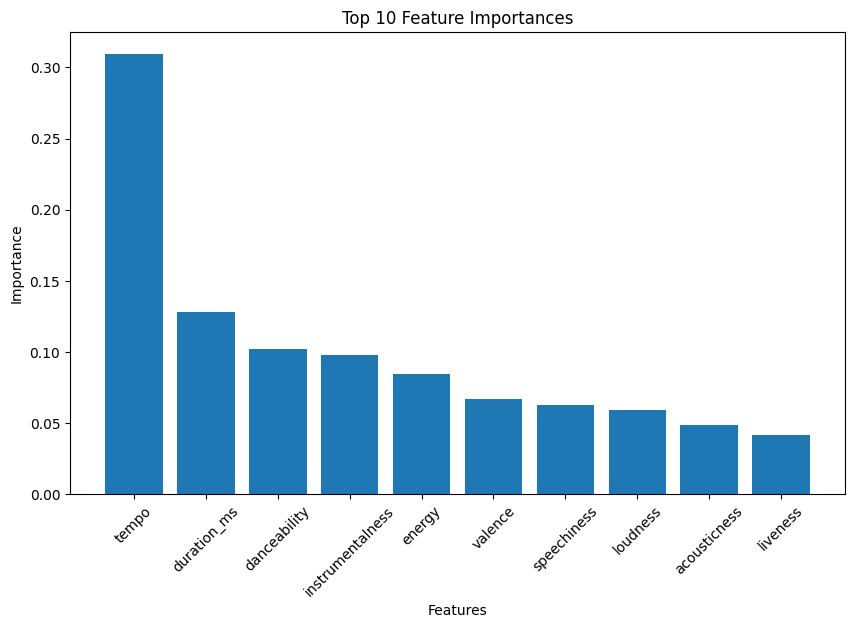

In [118]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from scipy.stats import zscore

# 데이터 로드 및 전처리
file_path = "./input/genres_v2.csv"
df = pd.read_csv(file_path, low_memory=False)

df = df.drop(['type', 'id', 'uri', 'track_href', 'analysis_url', 'song_name',
              'Unnamed: 0', 'title', 'key', 'mode', 'time_signature'], axis=1)

df_y = df['genre']
df_x = df.drop(['genre'], axis=1)

# 레이블 인코딩
label_encoder = LabelEncoder()
df_y_encoded = label_encoder.fit_transform(df_y)
df_y = df_y_encoded

# 이상치 대체 함수 (평균 대체)
def outlier_mean(class_label):
    return df_x[df_y == class_label].mean()

# 이상치 처리 함수
def impute_outliers(df_x, df_y, threshold):
    z_scores = np.abs(zscore(df_x))
    outliers_indices = np.where(z_scores > threshold)[0]
    df_x_imputed = df_x.copy()
    
    for idx in np.unique(outliers_indices):
        class_label = df_y[idx]
        imputed_values = outlier_mean(class_label)
        for col in df_x.columns:
            df_x_imputed.at[idx, col] = np.array(imputed_values[col]).astype(df_x[col].dtype)
    
    return df_x_imputed

# K-Fold 교차 검증을 통한 학습 및 평가 함수
def train_and_evaluate_with_kfold(df_x, df_y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    val_accuracies = []
    test_accuracies = []

    for train_index, test_index in kf.split(df_x):
        X_train, X_test = df_x.iloc[train_index], df_x.iloc[test_index]
        y_train, y_test = df_y[train_index], df_y[test_index]

        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=1, stratify=y_train)
        
        # RandomForest 모델 적용
        model = DecisionTreeClassifier(random_state=1)
        model.fit(X_train, y_train)

        pred = model.predict(X_test)

        # 검증 정확도
        pred_val = model.predict(X_val)
        acc_val = accuracy_score(y_val, pred_val)
        val_accuracies.append(acc_val)

        # 테스트 정확도
        pred_test = model.predict(X_test)
        acc_test = accuracy_score(y_test, pred_test)
        test_accuracies.append(acc_test)
        report(y_test, pred, label_encoder) 

    avg_val_acc = np.mean(val_accuracies)
    avg_test_acc = np.mean(test_accuracies)
    
    return avg_val_acc, avg_test_acc, model

threshold = 3
df_x_imputed = impute_outliers(df_x, df_y, threshold)

avg_val_acc, avg_test_acc, final_model = train_and_evaluate_with_kfold(df_x_imputed, df_y, k=5)

print(f"Validation Accuracy: {avg_val_acc:.4f}")
print(f"Test Accuracy: {avg_test_acc:.4f}")

# 학습 곡선 출력
train_sizes, train_scores, val_scores = learning_curve(
    RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1),
    df_x_imputed, df_y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o')
plt.plot(train_sizes, val_mean, label="Validation Accuracy", marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()

# Feature Importance 출력
importances = final_model.feature_importances_
feature_names = df_x.columns
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(10), importances[sorted_idx[:10]], align='center')
plt.xticks(range(10), [feature_names[i] for i in sorted_idx[:10]], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Top 10 Feature Importances")
plt.show()